Pandas 可能是最流行的用于数据分析的 Python 库。GeoPandas 扩展了 Pandas 的数据类型，使我们能够更轻松地在 Python 中处理地理空间数据。它目前有两种数据类型结构：GeoSeries 和 GeoDataFrame，它们分别是 pandas.Series 和 pandas.DataFrame 的子类。

**GeoDataFrame** 是 **GeoPandas** 中的核心数据结构，可以存储几何列并执行空间操作。GeoSeries 数据结构可以包含任何几何类型，例如点、线、多边形等。

总体上，GeoDataFrame 是 pandas.Series 和 geopandas.GeoSeries 的组合。


为了按照本文中的方法进行操作，您需要从 ArcGIS Hub 下载一个世界国家的 Shapefile (https://hub.arcgis.com/datasets/esri::world-countries-generalized/)。 如果您已经有自己的 Shapefile 数据，也可以使用您自己的数据。
![](img/01-arcgis.png)

<br><br>


## 一、安装GeoPandas
GeoPandas库是纯 Python 编写的，但是它的一些依赖库是用 C 编写的，比如 GEOS、GDAL、PROJ。有时在 Windows 上安装这些 C 库并不容易。

In [ ]:
!pip3 install pyogrio
!pip3 install pyproj
!pip3 install rtree
!pip3 install shapely
!pip3 install geopandas

In [60]:
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

print('Geopandas版本号: ', gpd.__version__)

Geopandas版本号:  0.13.2


<br><br>


## 二、读写数据
### 2.1 读入数据
geopandas库支持多种数据格式
- shp
- geojson

In [61]:
import os

os.listdir('data')

['.DS_Store',
 'World_Countries_Generalized',
 'World_Countries_Generalized.geojson',
 'world-population.geo.json']

#### 2.1.1 shp
![](img/02-shp_data.png)

In [62]:
import geopandas as gpd

#shp必须与shx同处于一个文件夹内
gdf = gpd.read_file('data/World_Countries_Generalized/World_Countries_Generalized.shp')
gdf.head()

FID         COUNTRY ISO     COUNTRYAFF AFF_ISO  SHAPE_Leng  SHAPE_Area  \
0    1     Afghanistan  AF    Afghanistan      AF   50.803210   62.566714   
1    2         Albania  AL        Albania      AL    9.625038    3.073540   
2    3         Algeria  DZ        Algeria      DZ   70.540082  213.513461   
3    4  American Samoa  AS  United States      US    0.600124    0.013720   
4    5         Andorra  AD        Andorra      AD    0.937352    0.055585   

                                            geometry  
0  POLYGON ((61.27655 35.60725, 61.29638 35.62854...  
1  POLYGON ((19.57083 41.68527, 19.58195 41.69569...  
2  POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...  
3  POLYGON ((-170.74390 -14.37555, -170.74942 -14...  
4  POLYGON ((1.44584 42.60194, 1.48653 42.65042, ...

<br>

### 2.1.2 geojson
GeoJson是Json文件，所以该类数据文件尾缀名一般为``.geojson`` 或  ``.json``

In [63]:
import geopandas as gpd

gdf2 = gpd.read_file('data/world-population.geo.json')
gdf2.head()

NAME ISO_3_CODE ISO_2_CODE    AREA       NAME_1   POP2005  \
0  Afghanistan        AFG         AF   65209  Afghanistan  25067407   
1      Albania        ALB         AL    2740      Albania   3153731   
2      Algeria        DZA         DZ  238174      Algeria  32854159   
3      Andorra        AND         AD       0      Andorra     73483   
4       Angola        AGO         AO  124670       Angola  16095214   

               REGION GMI_CNTRY      NAME_12  \
0                Asia       AFG  Afghanistan   
1              Europe       ALB      Albania   
2         NorthAfrica       DZA      Algeria   
3              Europe       AND      Andorra   
4  Sub Saharan Africa       AGO       Angola   

                                            geometry  
0  POLYGON ((65.62730 37.33320, 65.64693 37.45888...  
1  POLYGON ((19.39732 42.31707, 19.46971 42.39999...  
2  POLYGON ((-1.25389 32.21471, -1.25000 32.32693...  
3  POLYGON ((1.71097 42.47350, 1.53333 42.43610, ...  
4  MULTIPOLYGON (((12.01007 -5.02062, 12.16639 -4...

<br><br>

### 2.2 保存数据
我们可以使用 GeoDataFrame.to_file() 将切片或修改后的 GeoDataFrame 写回文件。

- gdf.to_file('shp文件路径')
- gdf.to_file('GeoJson文件路径', driver='GeoJSON')


默认的文件格式是 Shapefile，但我们可以使用 driver 关键字指定其他格式。例如，让我们将 DataFrame 保存为 GeoJSON 格式。


In [20]:
gdf2.to_file('output/World_Countries_Generalized.shp')
gdf2.to_file('output/World_Countries_Generalized.geojson', driver='GeoJSON')

<br><br>

## 三、GeoDataFrame数据类型
让我们以 gdf GeoDataFrame 为例。大多数用于 pandas 的方法在 GeoPandas 中仍然适用。在本节中，我们只会看到一些示例。

In [76]:
print(len(gdf2))
gdf2.head(5)

211


NAME ISO_3_CODE ISO_2_CODE    AREA       NAME_1     POP2005  \
0  Afghanistan        AFG         AF   65209  Afghanistan  25067407.0   
1      Albania        ALB         AL    2740      Albania   3153731.0   
2      Algeria        DZA         DZ  238174      Algeria  32854159.0   
3      Andorra        AND         AD       0      Andorra     73483.0   
4       Angola        AGO         AO  124670       Angola  16095214.0   

               REGION GMI_CNTRY      NAME_12  \
0                Asia       AFG  Afghanistan   
1              Europe       ALB      Albania   
2         NorthAfrica       DZA      Algeria   
3              Europe       AND      Andorra   
4  Sub Saharan Africa       AGO       Angola   

                                            geometry  
0  POLYGON ((65.62730 37.33320, 65.64693 37.45888...  
1  POLYGON ((19.39732 42.31707, 19.46971 42.39999...  
2  POLYGON ((-1.25389 32.21471, -1.25000 32.32693...  
3  POLYGON ((1.71097 42.47350, 1.53333 42.43610, ...  
4  MULTIPOLYGON (((12.01007 -5.02062, 12.16639 -4...

In [77]:
#数据形状
gdf2.shape

(211, 10)

211行，8列，最后一列是多边形几何数据

### 3.1 坐标参考系统（CRS）
通常我们使用一个二维坐标系统，其中经度（垂直的南北线）和纬度（东西方向的水平线）用于标识地球表面上的位置。

GeoDataFrame 包含了将几何列中定义的多边形映射到地球表面的CRS信息。要检查CRS，我们使用 .crs 方法。

In [81]:
gdf2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<br>

### 3.2 筛选
筛选出中国的数据

In [80]:
gdf2[gdf2['NAME']=='China']

NAME ISO_3_CODE ISO_2_CODE    AREA NAME_1       POP2005 REGION GMI_CNTRY  \
37  China        CHN         CN  932743  China  1.312979e+09   Asia       CHN   

   NAME_12                                           geometry  
37   China  MULTIPOLYGON (((121.83390 31.45388, 121.54640 ...

<br>


### 3.2 中心
每个记录所代码实体(国家、省州、城市)的地理中心

In [68]:
gdf2.centroid

0       POINT (66.02695 33.83959)
1       POINT (20.06466 41.14350)
2        POINT (2.63167 28.16258)
3        POINT (1.58730 42.54147)
4      POINT (17.54495 -12.29359)
                  ...            
206     POINT (47.59134 15.77731)
207     POINT (20.80471 44.02662)
208     POINT (23.65690 -2.87535)
209    POINT (27.79925 -13.45302)
210    POINT (29.87045 -19.00312)
Length: 211, dtype: geometry

<br>

### 3.3 投影
几何数据（多边形）转换到 EPSG 3857 坐标参考系统，并计算每个多边形的中心点（centroid）。 EPSG 3857 通常被称为 「Web Mercator 投影」，用于在 Web 地图上呈现地理数据。转换为此坐标参考系统可以用于生成更适合在 Web 地图上显示的数据。

根据代码运行提示， 更改代码。

In [69]:
gdf2.to_crs(3857).centroid

0       POINT (7354486.896 4017736.603)
1       POINT (2233478.912 5035365.825)
2        POINT (292615.786 3302567.699)
3        POINT (176697.417 5242446.985)
4      POINT (1953402.929 -1385745.990)
                     ...               
206     POINT (5299033.934 1780605.357)
207     POINT (2315093.566 5473720.440)
208     POINT (2633886.156 -323258.251)
209    POINT (3092719.338 -1515282.005)
210    POINT (3325201.834 -2158042.585)
Length: 211, dtype: geometry

<br>

### 3.4 计算区域面积
数据已经包含了一个 SHAPE_Area 列。假设没有这样的列，我们可以通过几何数据来计算面积。为了获得正确的面积，您必须使用**等面积投影**。适用于您的代码的投影是 EPSG 6933。它是柱面等面积投影。

In [70]:
gdf2.to_crs(6933).area

0      6.419639e+11
1      2.875576e+10
2      2.318240e+12
3      4.702513e+08
4      1.247851e+12
           ...     
206    3.990873e+11
207    8.856234e+10
208    2.325712e+12
209    7.521495e+11
210    3.892279e+11
Length: 211, dtype: float64

<br><br>

## 四、可视化
因为geopandas绘图功能是在matplotlib的基础上实现的，gdf.plot()一行代码就能绘图
### 4.1 最简地图

In [71]:
gdf2.plot()

<Axes: >

<br>

### 4.2 更改颜色
图的颜色和边界的颜色的更改

<Axes: >

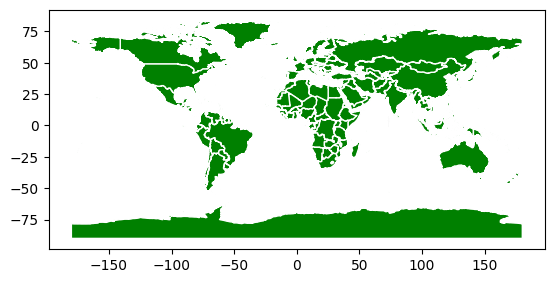

In [72]:
gdf2.plot(color='green', edgecolor='white')

<br>

### 4.3 colormap
使用matplotlib的colormaps配色

In [74]:
gdf2.plot(cmap='jet', linewidth=0.2, edgecolor='gray', column='NAME', figsize=(10, 5))

<Axes: >

<br>

### 4.4 Legend Colorbar
图例配色

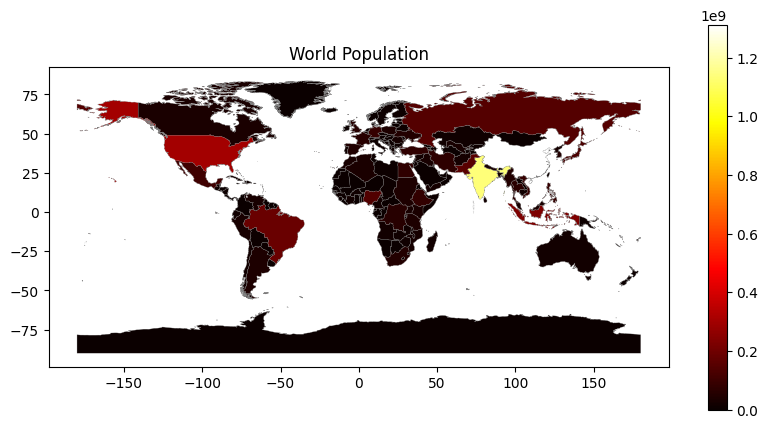

In [75]:
import matplotlib.pyplot as plt

gdf2['POP2005']=gdf2['POP2005'].astype(float)

gdf2.plot(cmap='hot',linewidth=0.2, edgecolor='gray',column='POP2005',legend=True,figsize=(10, 5))
plt.title('World Population')
plt.show()

<br>

### 4.5 局部
使用gdf2除了可以绘制全世界地图，还可以绘制局部地图，如美国地图

In [88]:
gdf2[gdf2['NAME']=='China']

NAME ISO_3_CODE ISO_2_CODE    AREA NAME_1       POP2005 REGION GMI_CNTRY  \
37  China        CHN         CN  932743  China  1.312979e+09   Asia       CHN   

   NAME_12                                           geometry  
37   China  MULTIPOLYGON (((121.83390 31.45388, 121.54640 ...

Text(0.5, 1.0, 'Map of China')

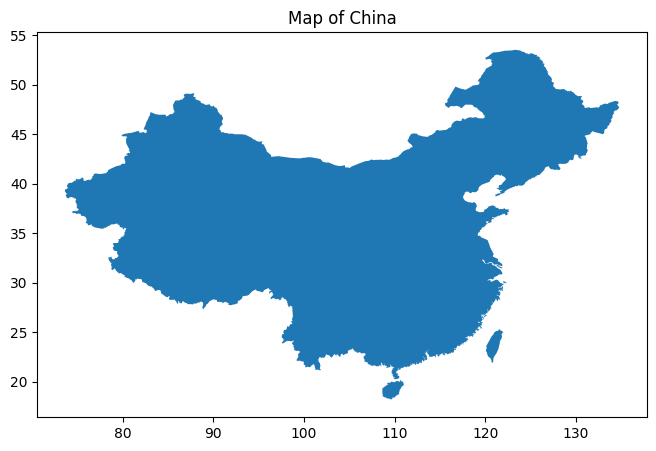

In [89]:
china_mainland = gdf2[gdf2['NAME'] =='China']
china_taiwan = gdf2[gdf2['NAME'] =='Taiwan']

fig, ax = plt.subplots(figsize=(10, 5))

china_mainland.plot(ax=ax) 
china_taiwan.plot(ax=ax)

plt.title('Map of China')